<a href="https://colab.research.google.com/github/yasminerekik/TSYP12CS/blob/initial/TrainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
from catboost import CatBoostClassifier,Pool
df=pd.read_csv('/content/DDos.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
# Afficher les colonnes pour connaître les features
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [7]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

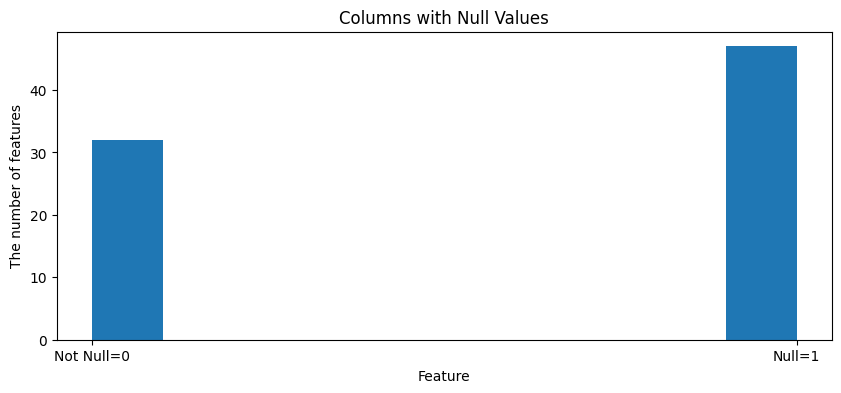

In [8]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

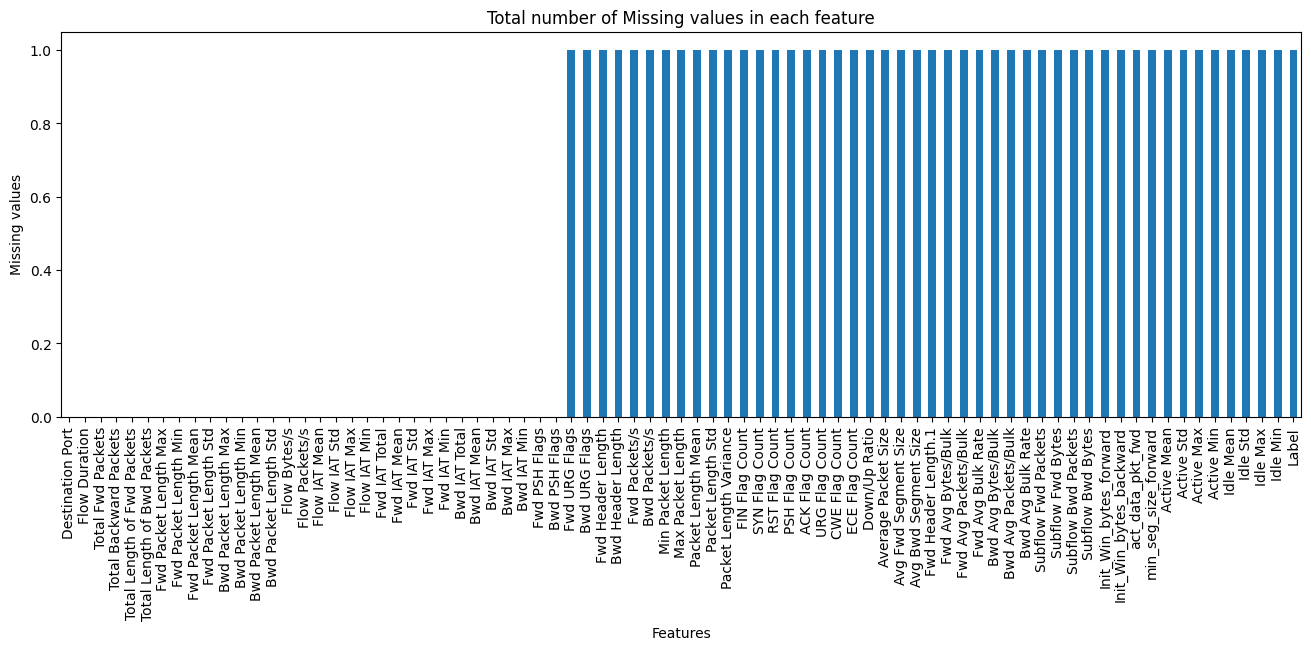

In [9]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

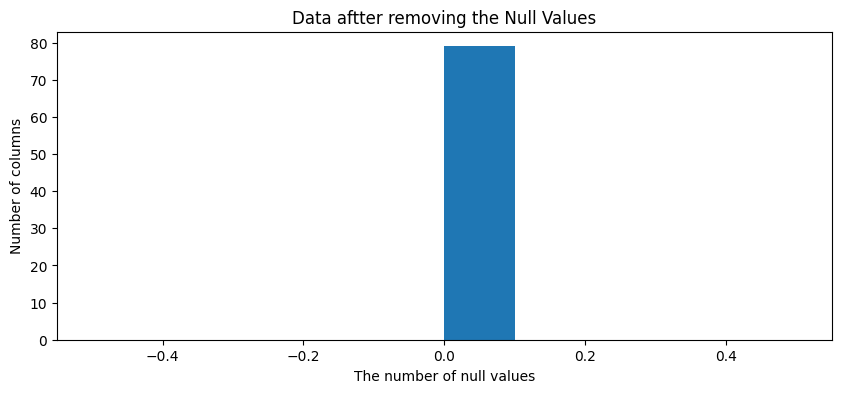

In [10]:
## Removing the null values
data_f=df.dropna()
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

In [11]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values
# To know the data types of the columns

(data_f.dtypes=='object')

<ipython-input-11-fbf108b7bfcd>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [12]:

# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

<ipython-input-12-4f96cf6dbfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


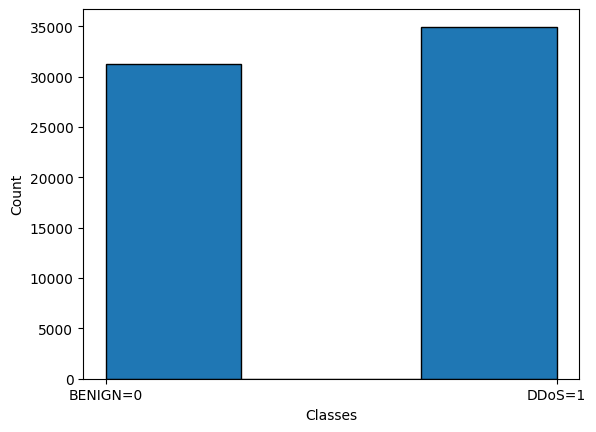

In [13]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [14]:
df.describe()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


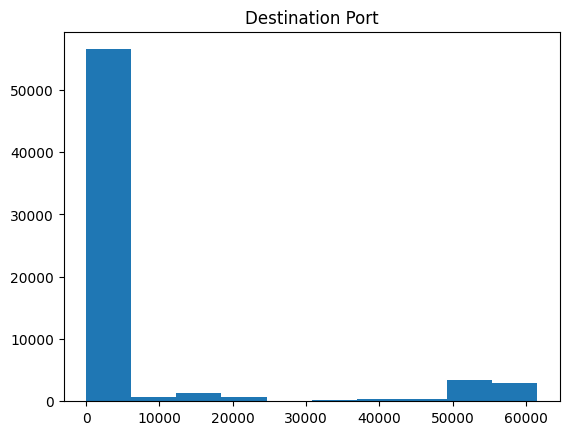

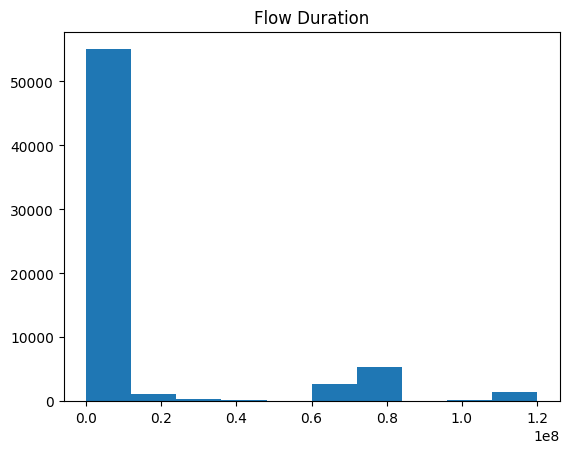

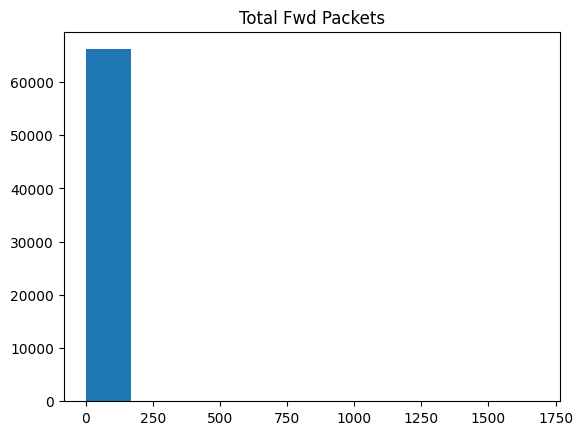

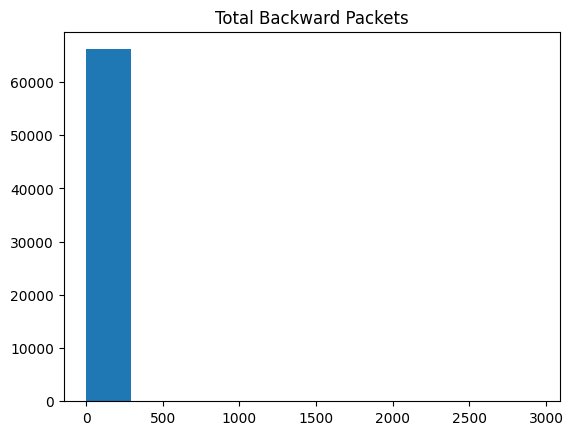

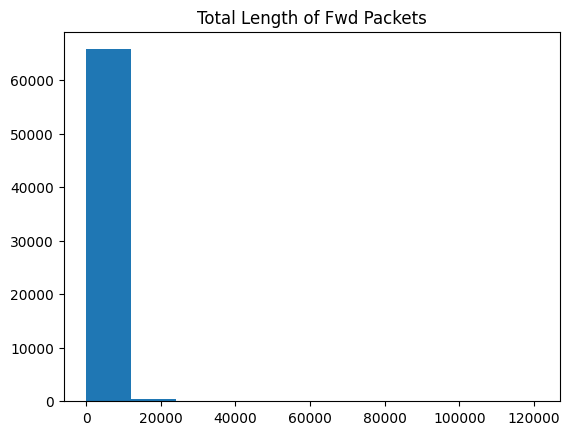

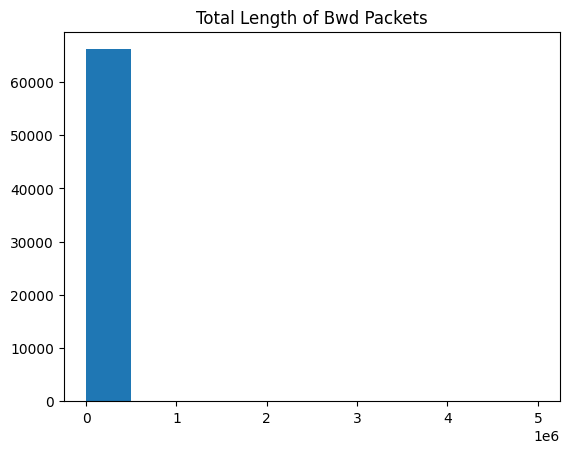

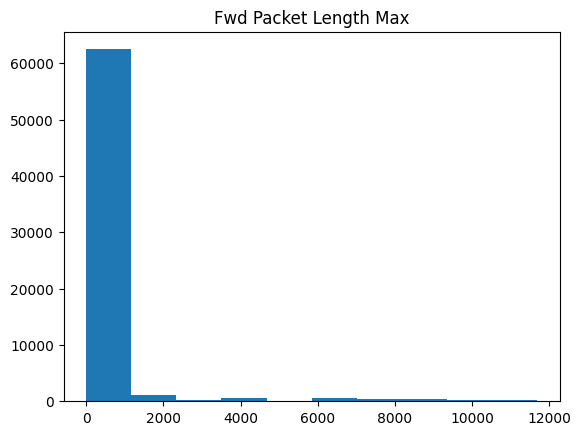

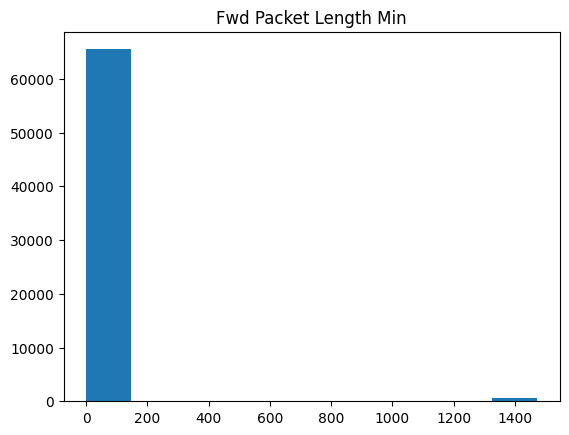

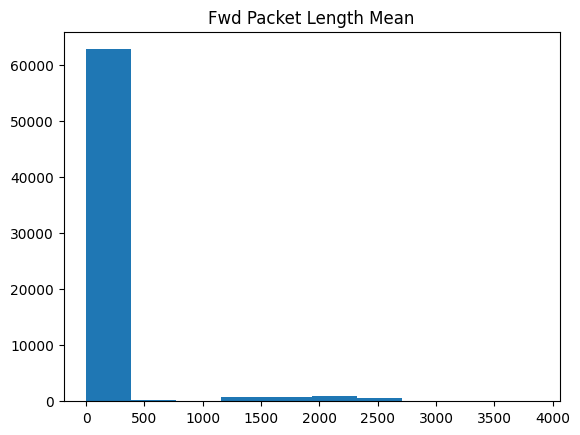

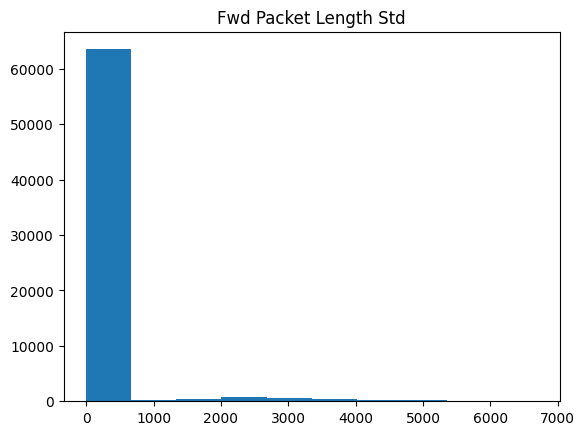

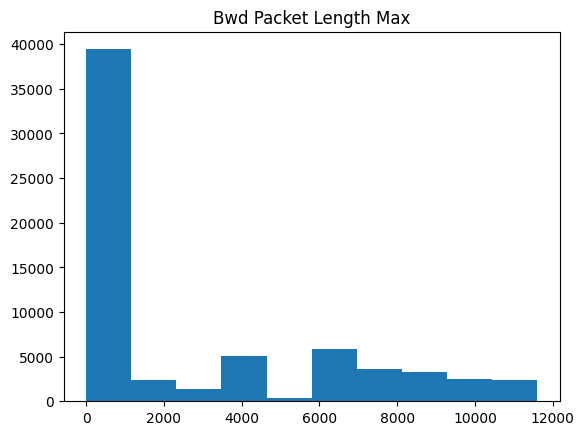

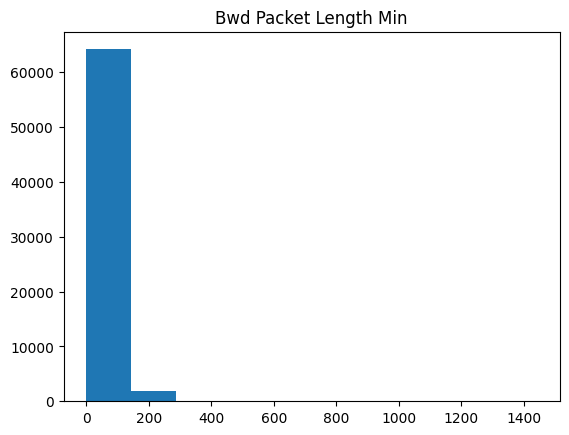

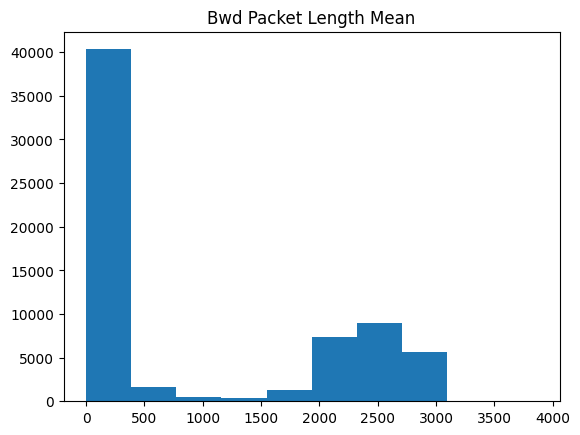

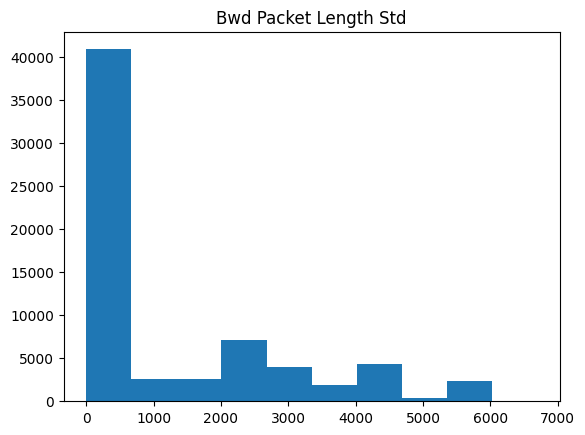

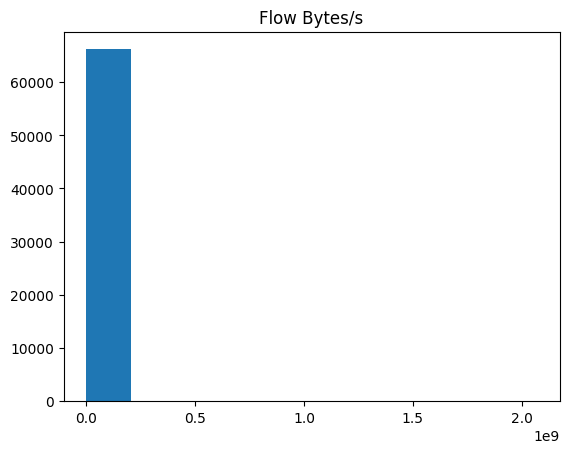

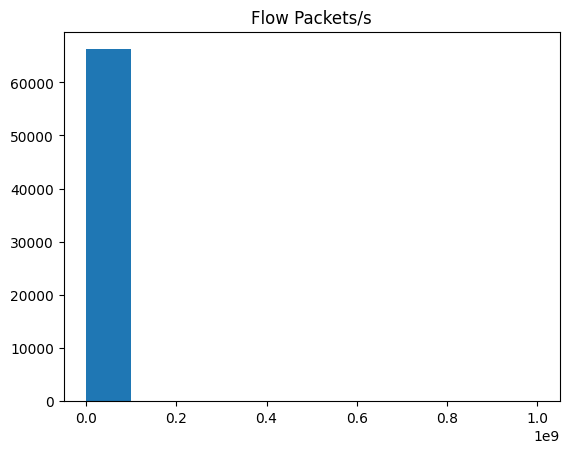

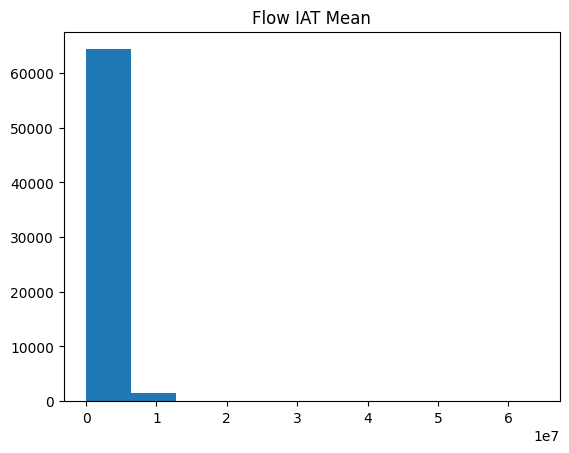

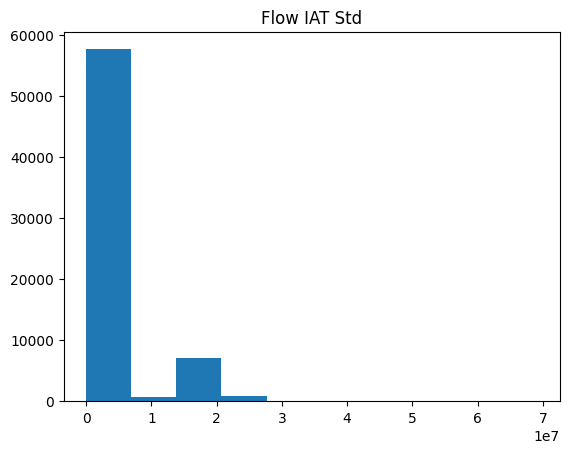

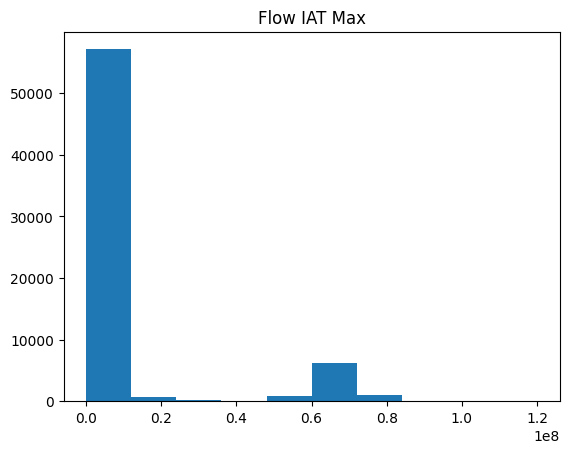

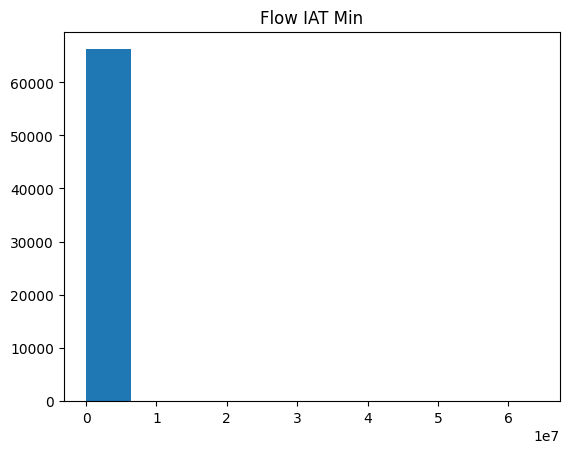

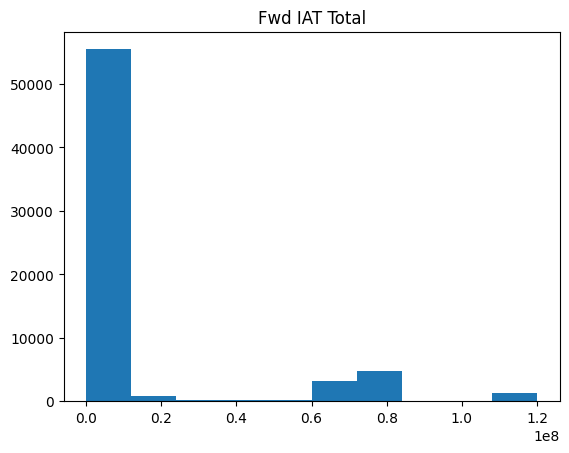

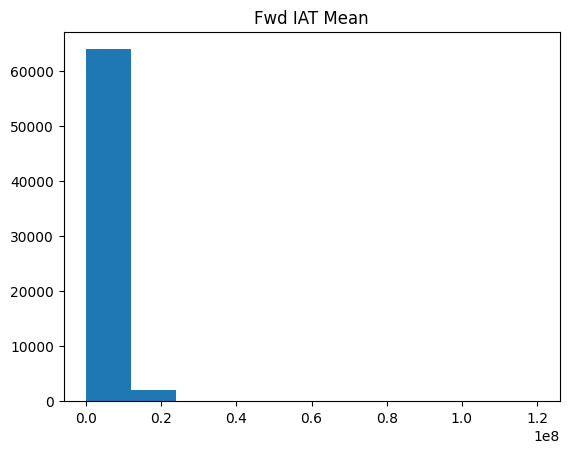

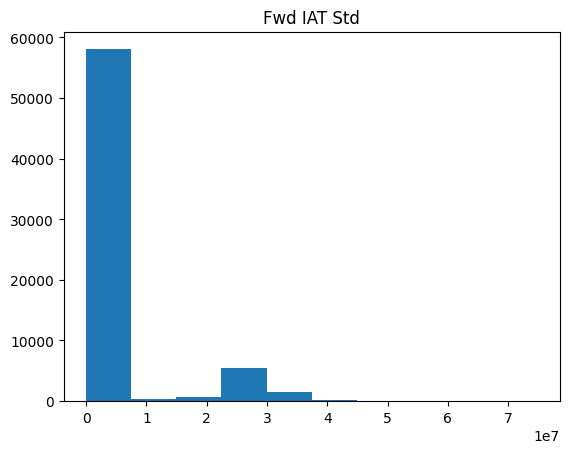

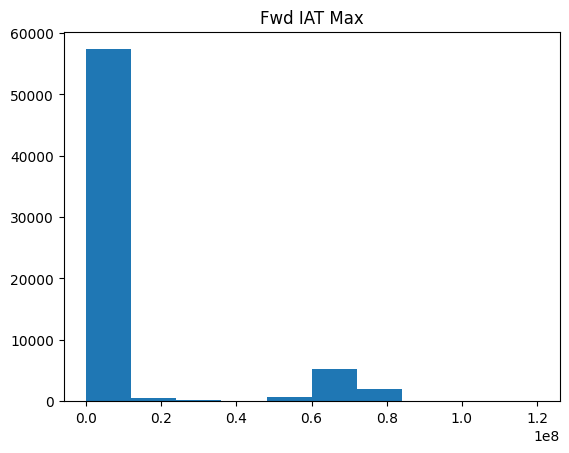

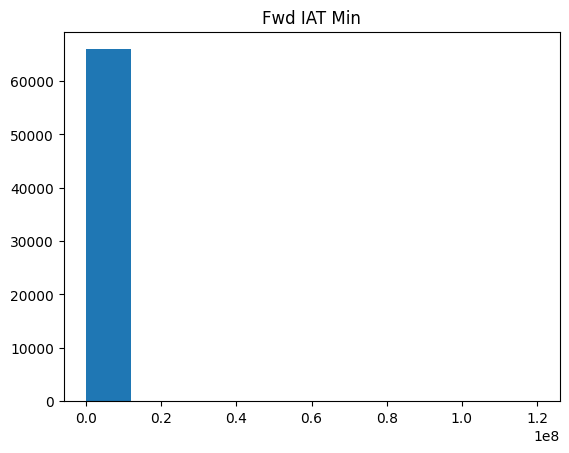

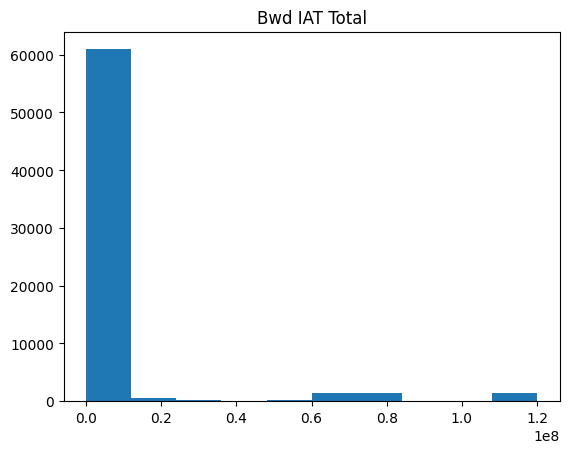

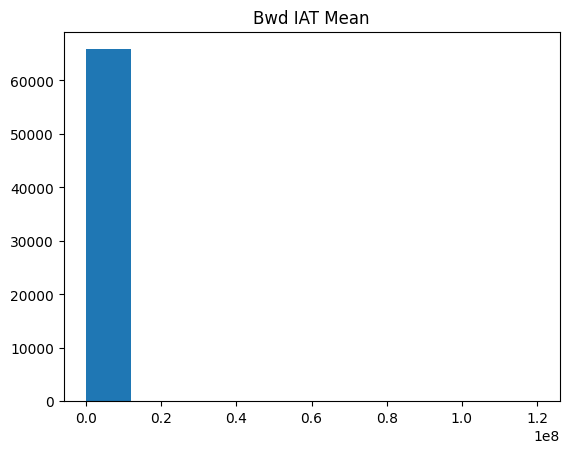

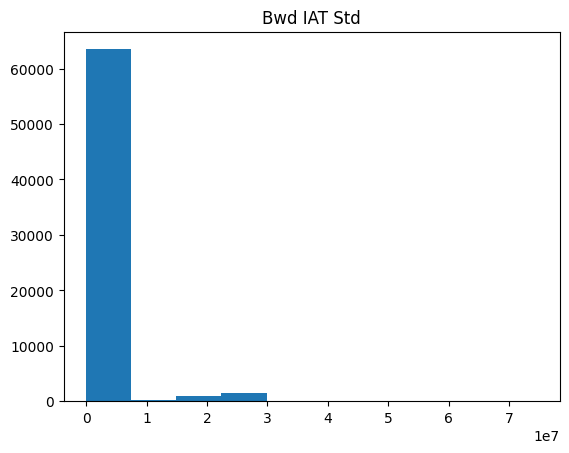

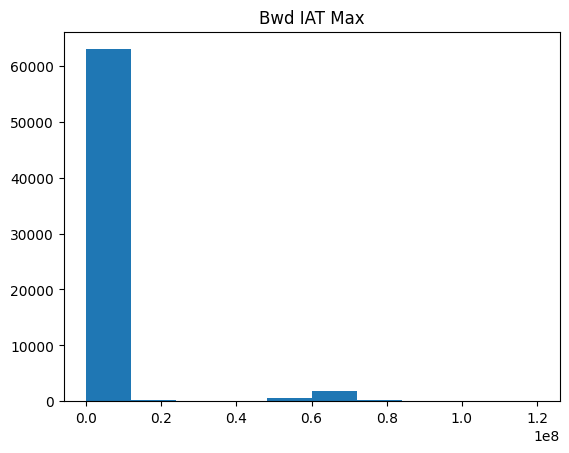

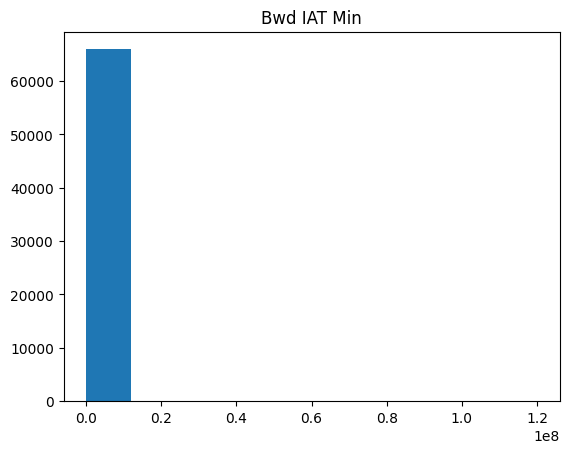

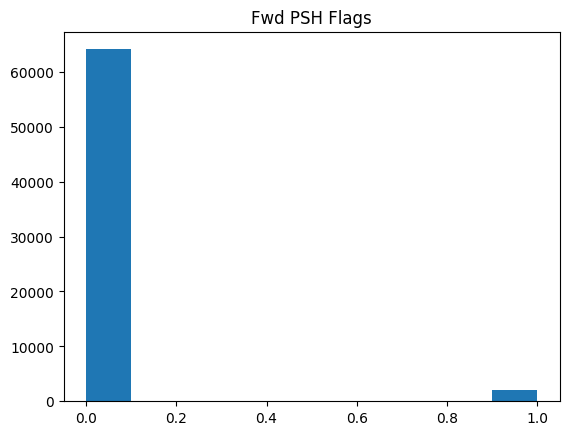

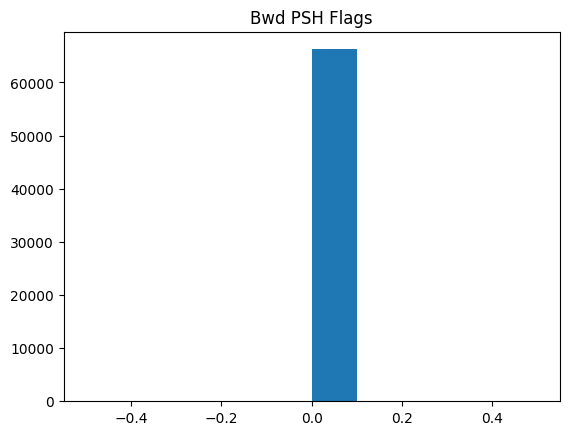

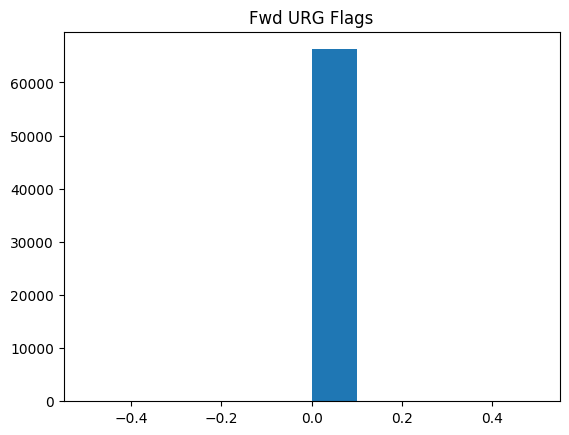

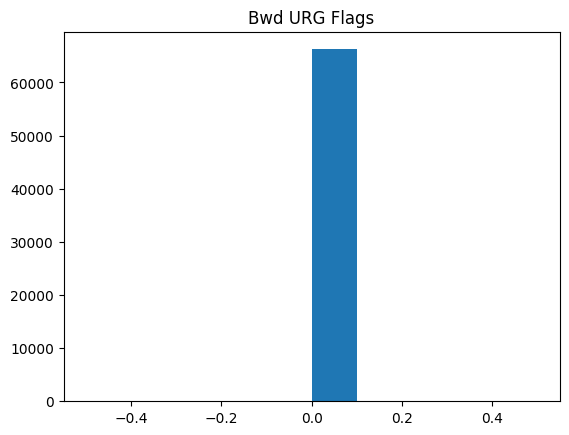

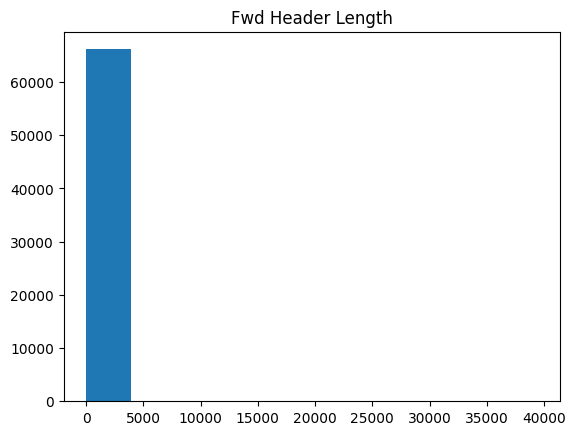

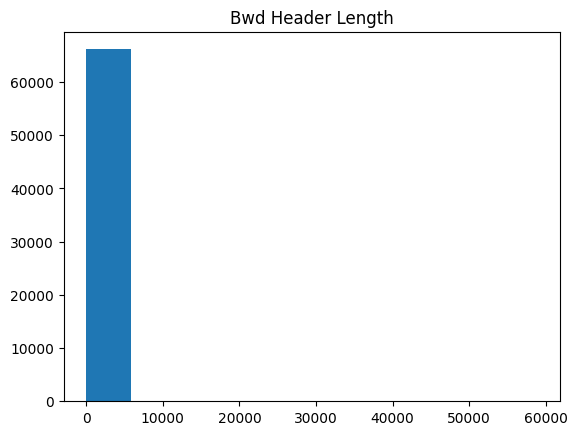

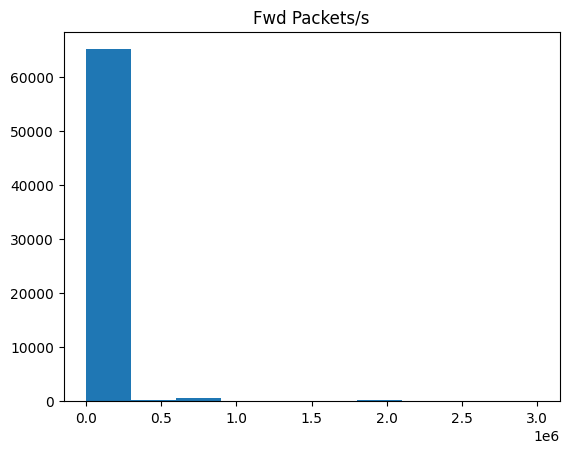

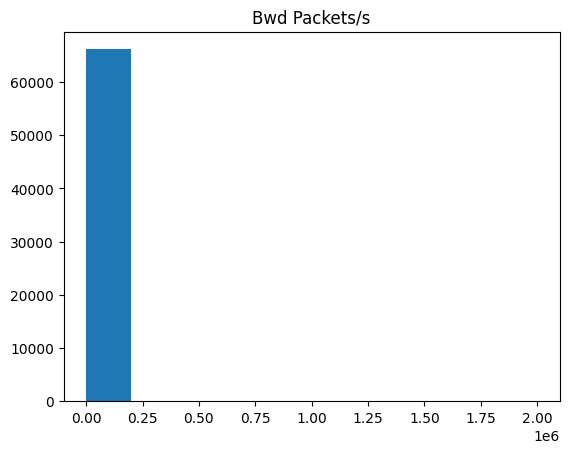

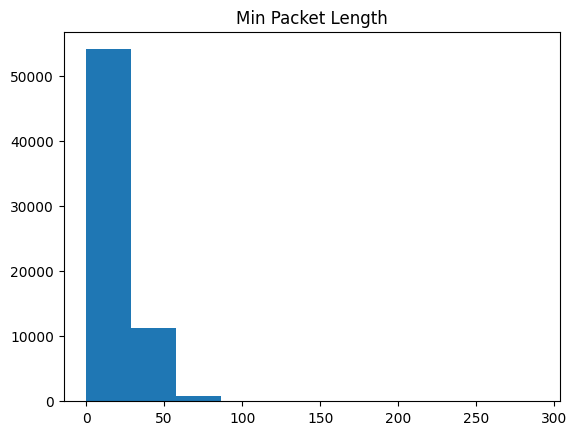

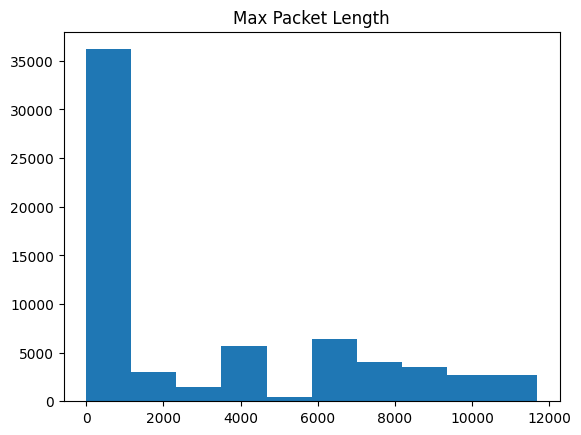

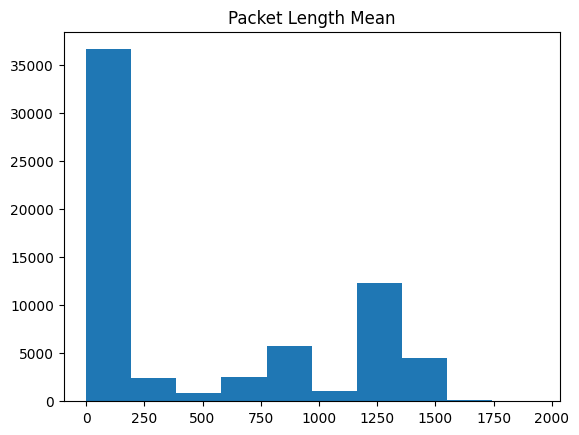

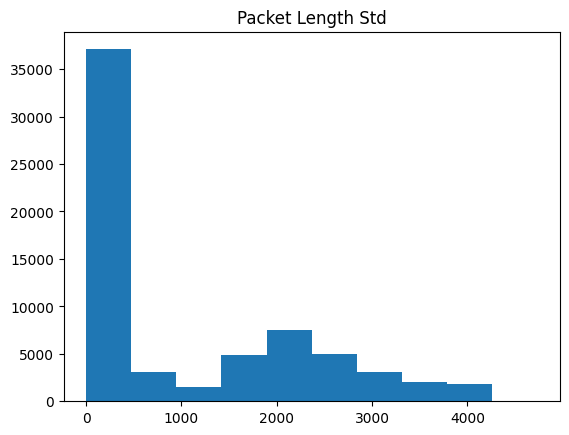

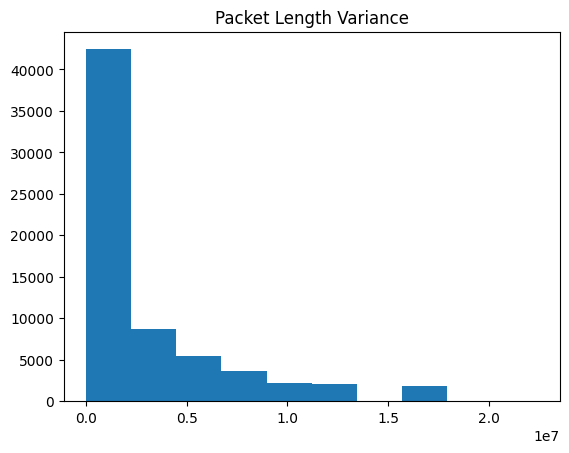

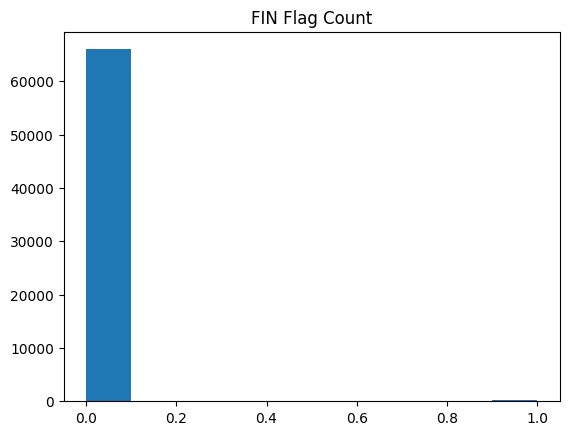

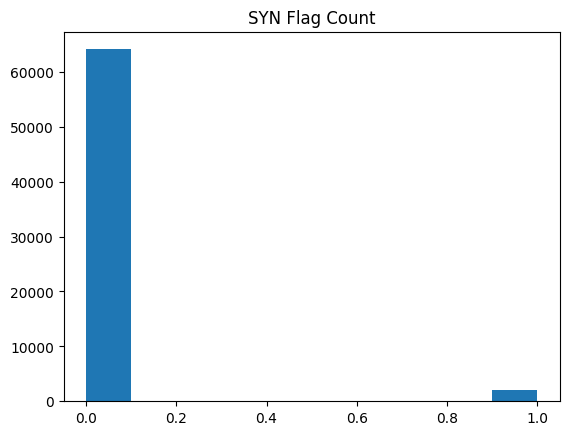

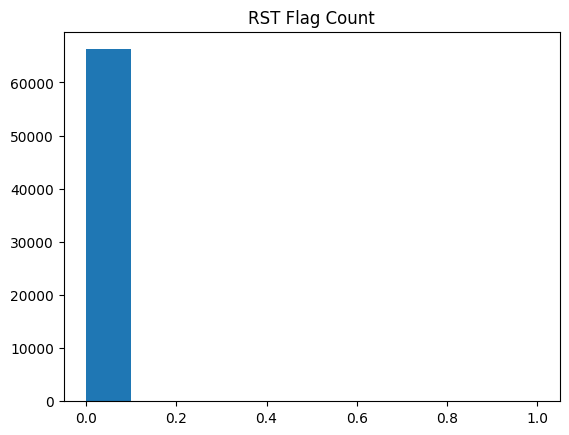

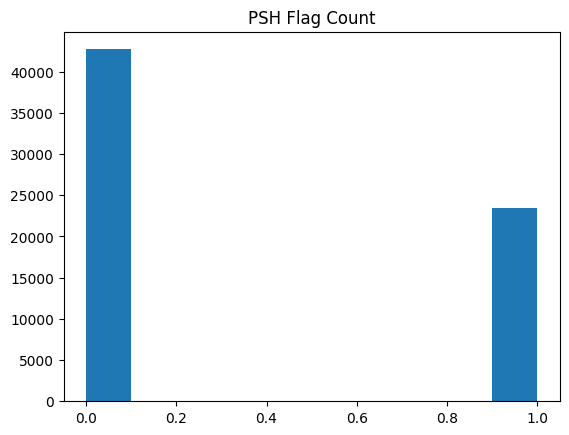

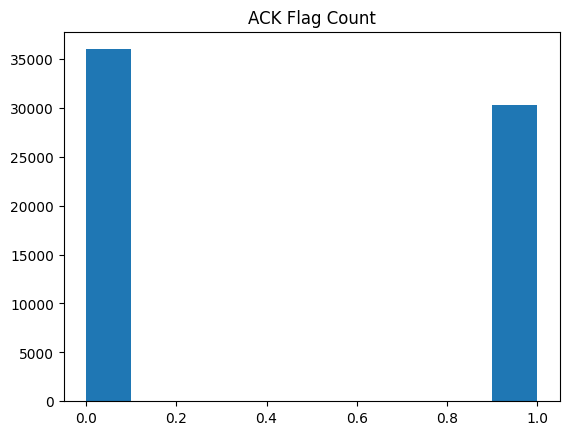

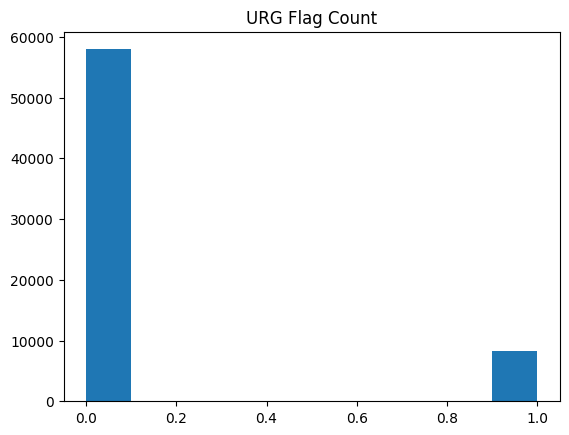

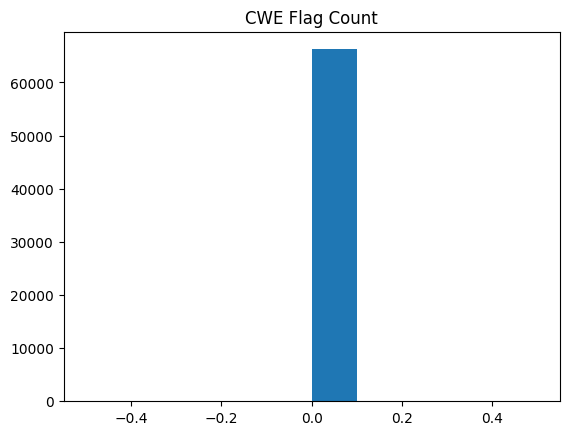

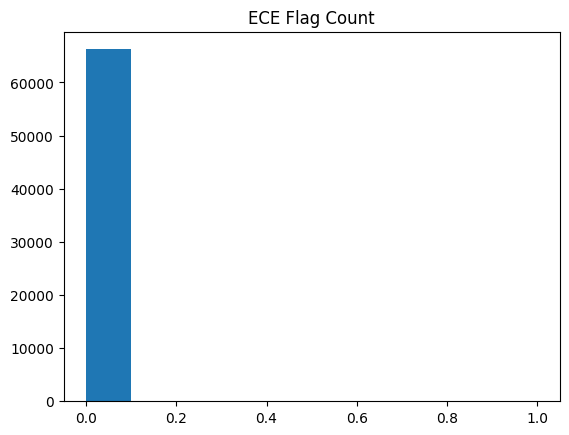

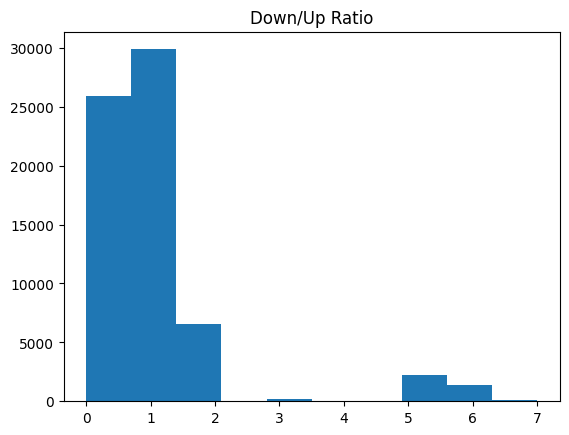

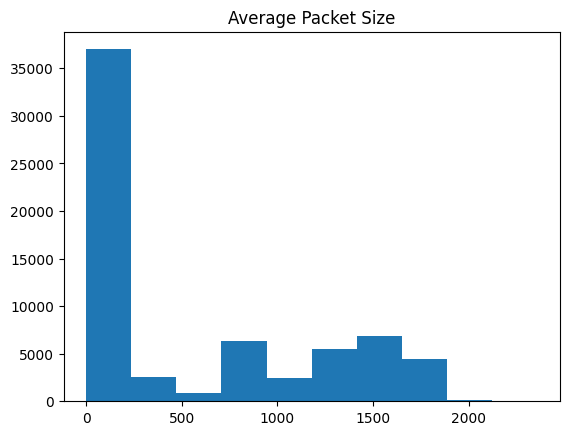

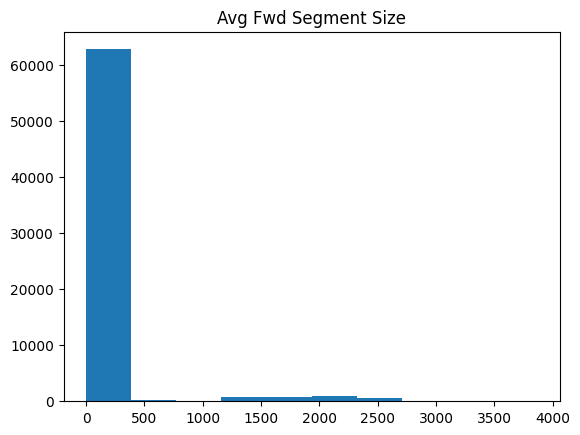

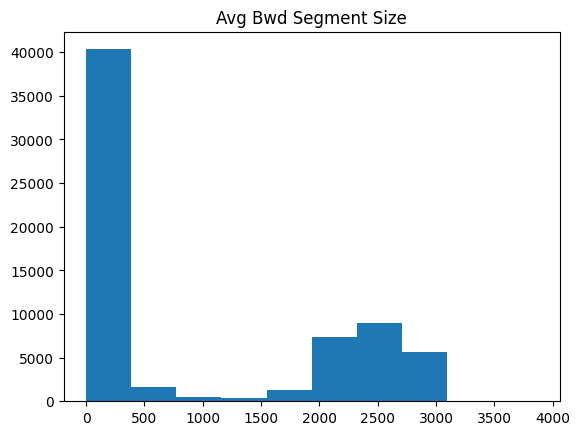

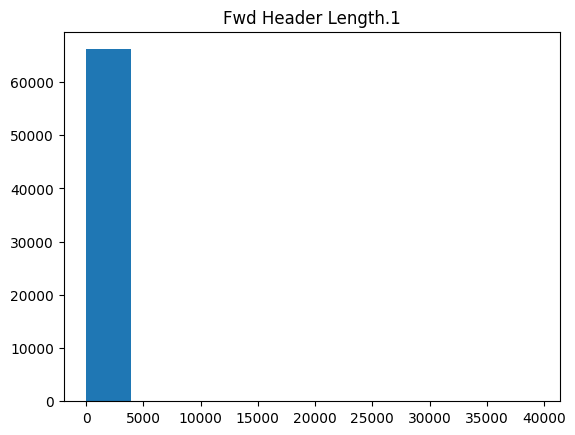

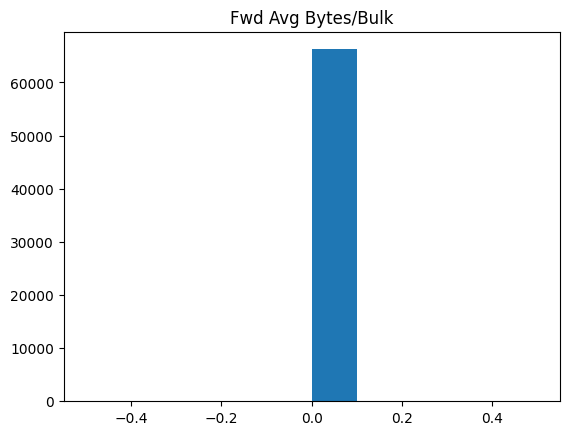

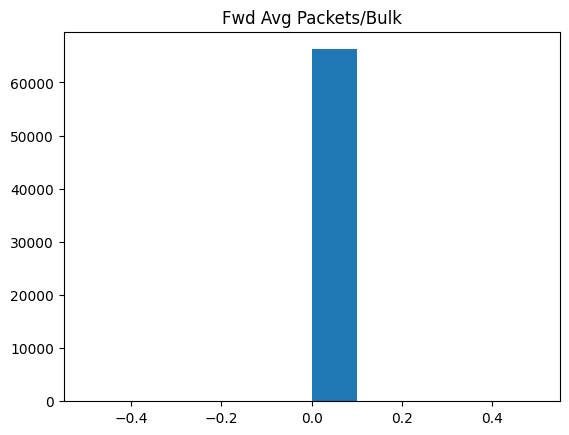

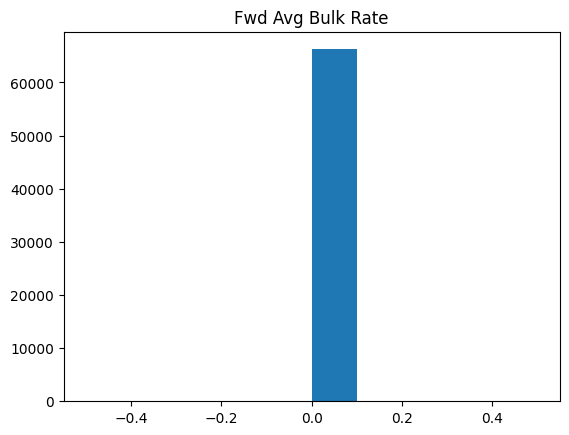

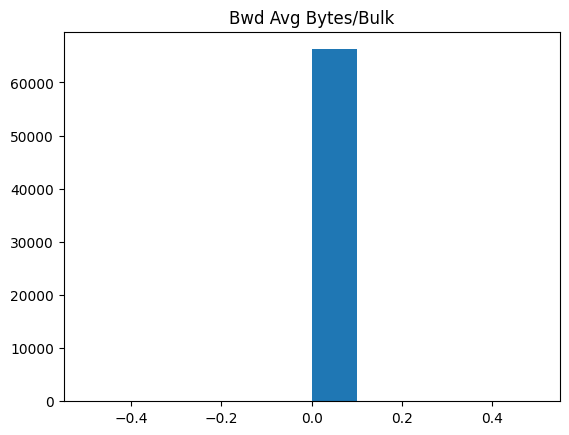

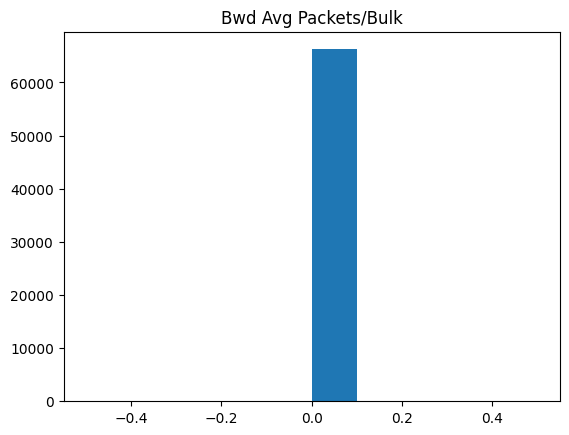

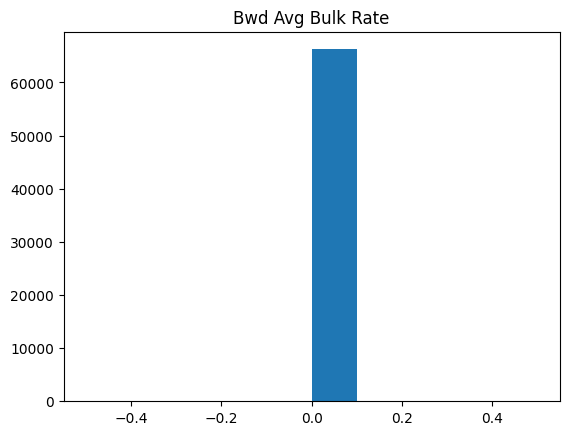

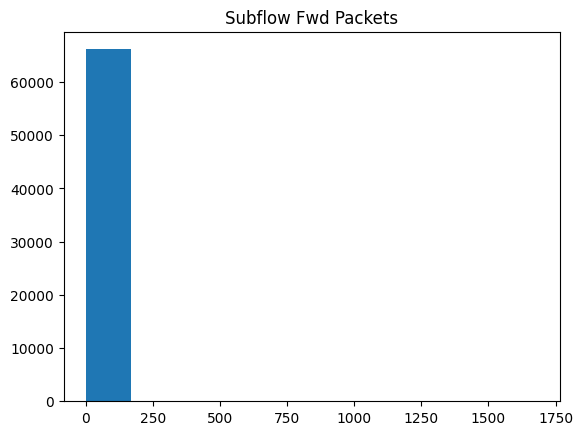

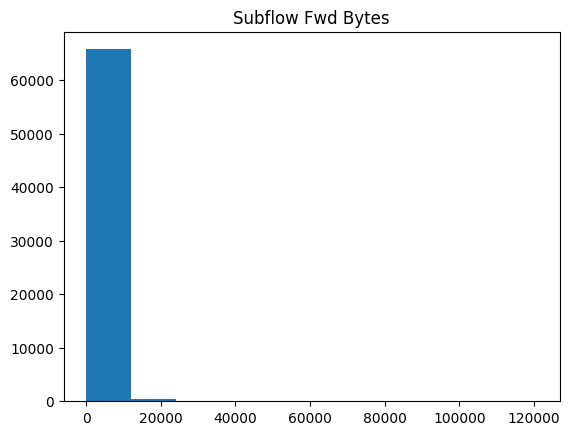

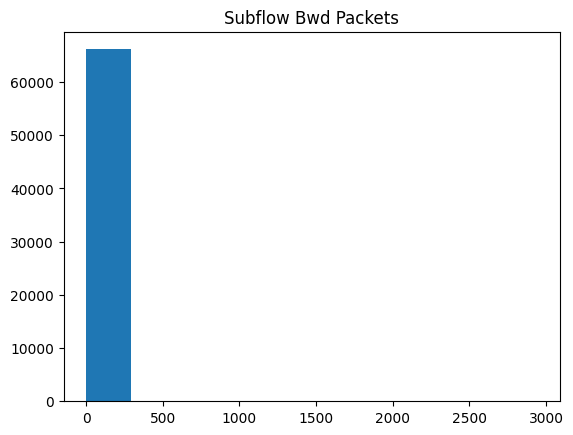

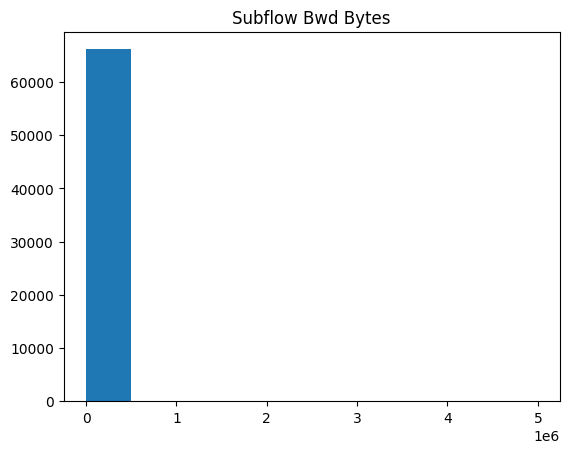

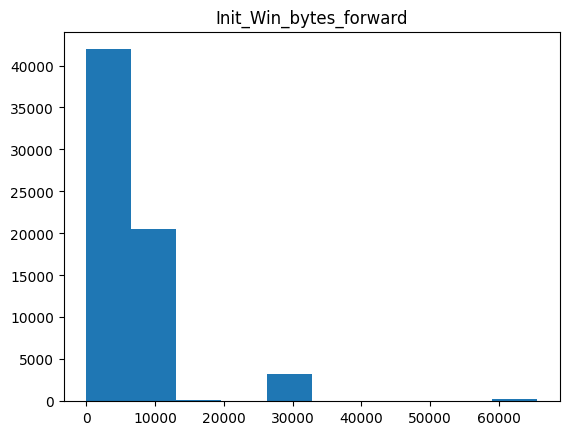

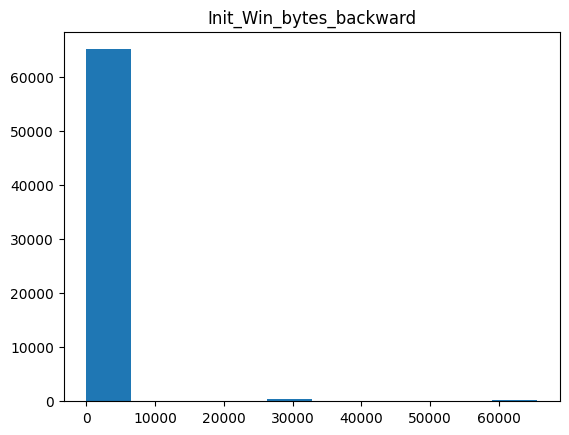

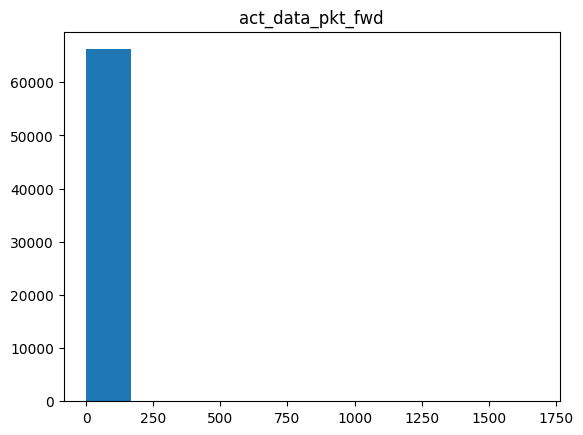

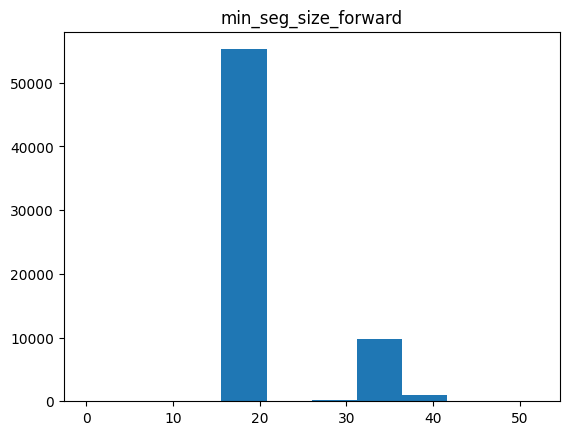

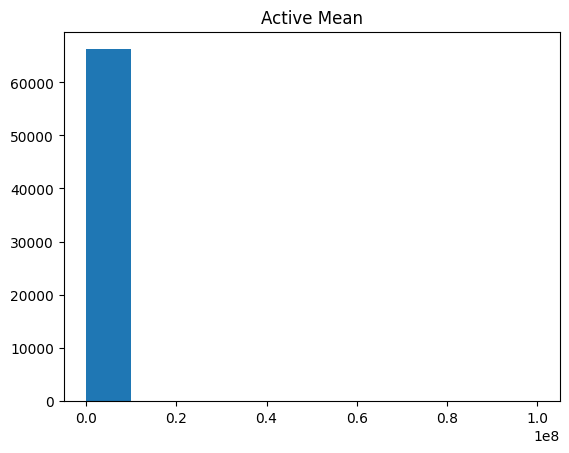

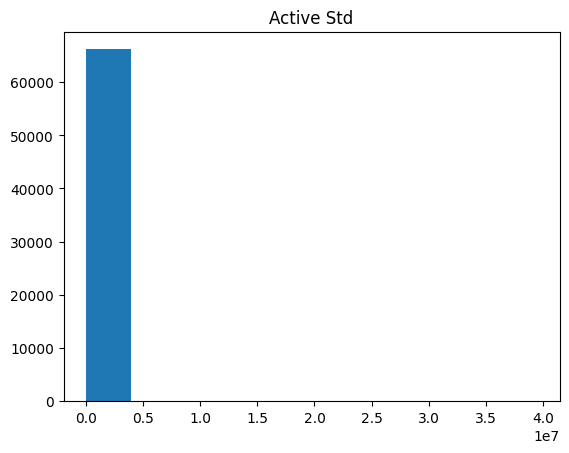

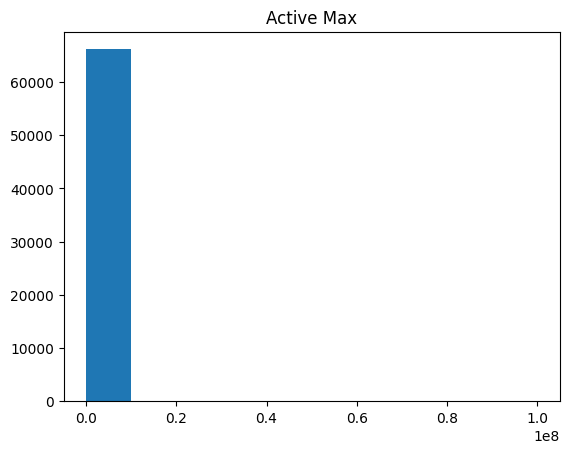

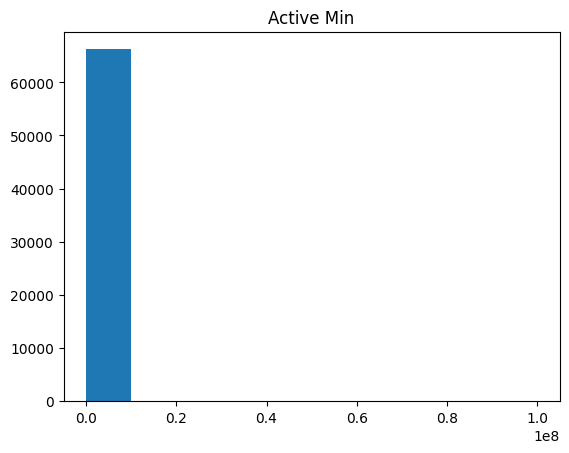

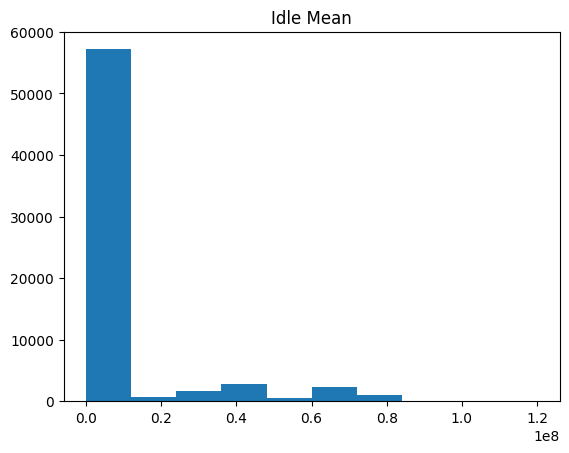

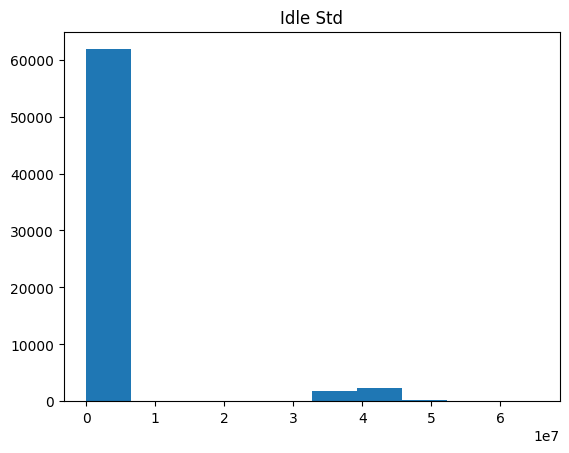

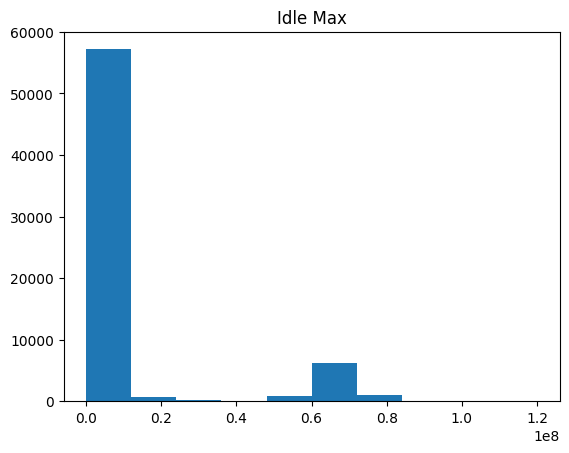

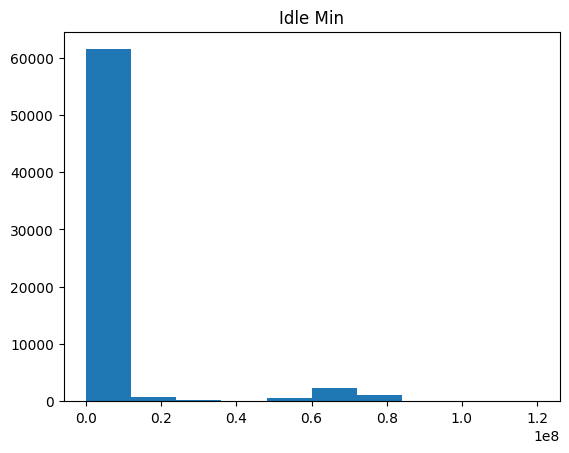

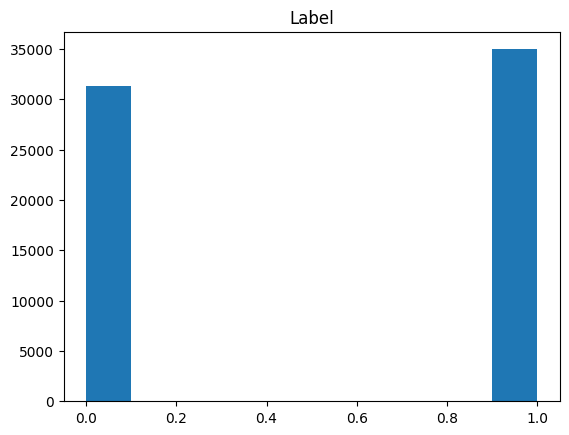

In [15]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [16]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


In [17]:
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66231,80,78317142,8,5,56,11607,20,0,7.000000,5.656854,...,6.0,20.0,15996.0,0.0,15996.0,15996.0,78200000.0,0.0,78200000.0,78200000.0
66232,80,48778,3,7,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66233,80,78359838,8,6,56,11601,20,0,7.000000,5.656854,...,6.0,20.0,30018.0,0.0,30018.0,30018.0,78300000.0,0.0,78300000.0,78300000.0
66234,80,50518,3,6,26,11601,20,0,8.666667,10.263203,...,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

train_pool = Pool(data=X_train,label=y_train)
test_pool = Pool(data=X_test,label = y_test)

catmodel = CatBoostClassifier()
catmodel.fit(train_pool,eval_set=test_pool)

Learning rate set to 0.081744
0:	learn: 0.4515706	test: 0.4513999	best: 0.4513999 (0)	total: 89.1ms	remaining: 1m 28s
1:	learn: 0.2815903	test: 0.2816253	best: 0.2816253 (1)	total: 145ms	remaining: 1m 12s
2:	learn: 0.1839018	test: 0.1840028	best: 0.1840028 (2)	total: 181ms	remaining: 1m
3:	learn: 0.1159948	test: 0.1161974	best: 0.1161974 (3)	total: 227ms	remaining: 56.4s
4:	learn: 0.0768059	test: 0.0771578	best: 0.0771578 (4)	total: 263ms	remaining: 52.4s
5:	learn: 0.0498260	test: 0.0503233	best: 0.0503233 (5)	total: 304ms	remaining: 50.4s
6:	learn: 0.0326336	test: 0.0332222	best: 0.0332222 (6)	total: 339ms	remaining: 48.1s
7:	learn: 0.0231933	test: 0.0239336	best: 0.0239336 (7)	total: 377ms	remaining: 46.8s
8:	learn: 0.0161912	test: 0.0170254	best: 0.0170254 (8)	total: 410ms	remaining: 45.1s
9:	learn: 0.0119356	test: 0.0127762	best: 0.0127762 (9)	total: 449ms	remaining: 44.4s
10:	learn: 0.0090842	test: 0.0100841	best: 0.0100841 (10)	total: 482ms	remaining: 43.4s
11:	learn: 0.0077876	t

In [19]:
y_pred = catmodel.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9993961048764531


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 9395     0]
 [   12 10464]]


In [22]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9395
           1       1.00      1.00      1.00     10476

    accuracy                           1.00     19871
   macro avg       1.00      1.00      1.00     19871
weighted avg       1.00      1.00      1.00     19871



In [23]:
from sklearn.metrics import log_loss
y_prob = catmodel.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print(f'Log Loss: {loss}')


Log Loss: 0.0017887552652605429


In [24]:
from sklearn.metrics import roc_auc_score
y_prob = catmodel.predict_proba(X_test)[:,1]  # Probabilité d'être dans la classe positive
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc}')


AUC: 0.9999991262117969


In [25]:
# Sauvegarder le modèle
import pickle

with open('catboost_model.pkl', 'wb') as model_file:
    pickle.dump(catmodel, model_file)

In [26]:
from google.colab import files
files.download('catboost_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X_train.shape)

(46365, 78)


In [27]:
print(X_train.head())


       Destination Port  Flow Duration  Total Fwd Packets  \
39247                80       72118228                  8   
14972               443        5103100                  9   
46164                80        1765988                  5   
53963                80        1267894                  3   
21837               443      115271225                 20   

       Total Backward Packets  Total Length of Fwd Packets  \
39247                       6                           56   
14972                       7                          390   
46164                       0                           30   
53963                       6                           26   
21837                      18                         1296   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
39247                        11601                     20   
14972                         3974                    209   
46164                            0                      6   
53963           

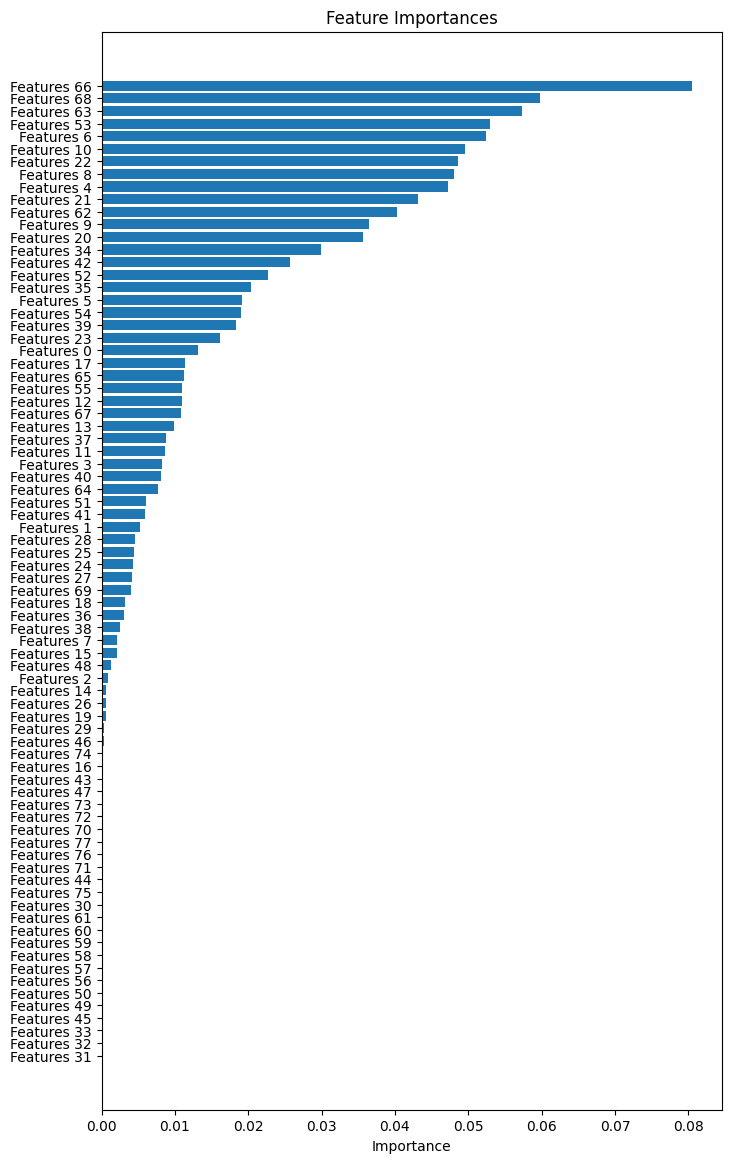

In [28]:
#TRAINING THE MODEL
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

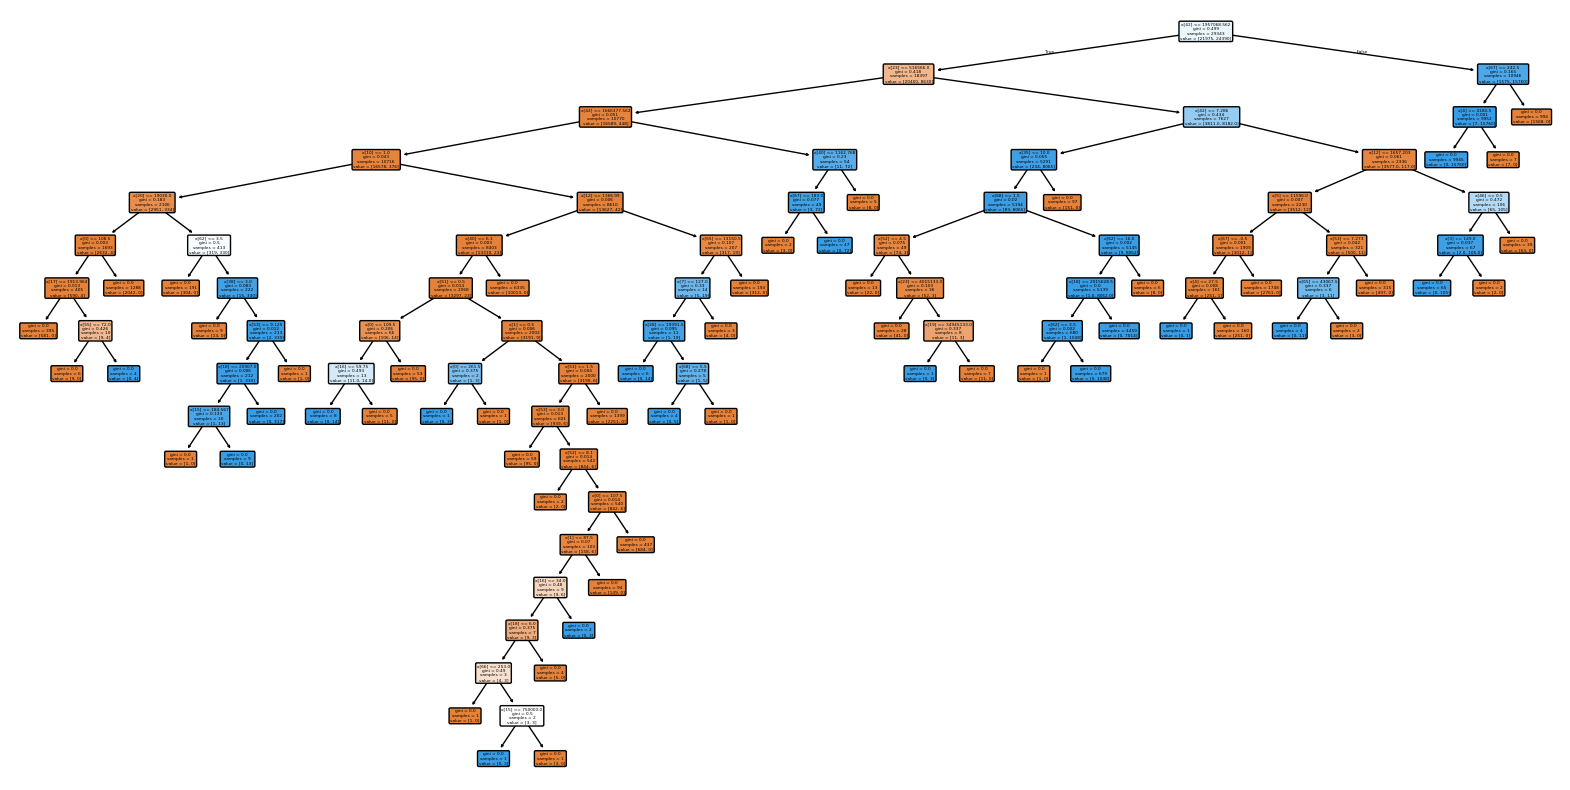

In [30]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [31]:
#MODEL EVALUATION

# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')



Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995


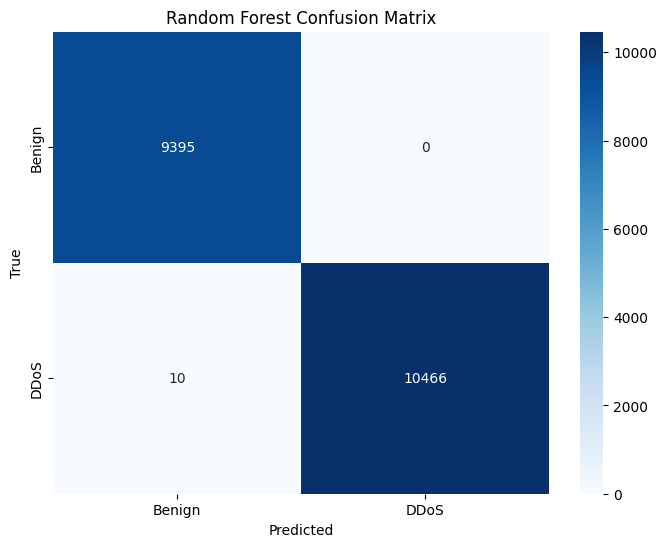

In [32]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [33]:
# Logistic Regression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#Evaluate Logistic Regression


lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')



Logistic Regression Metrics:
Accuracy: 0.9447
F1 Score: 0.9499


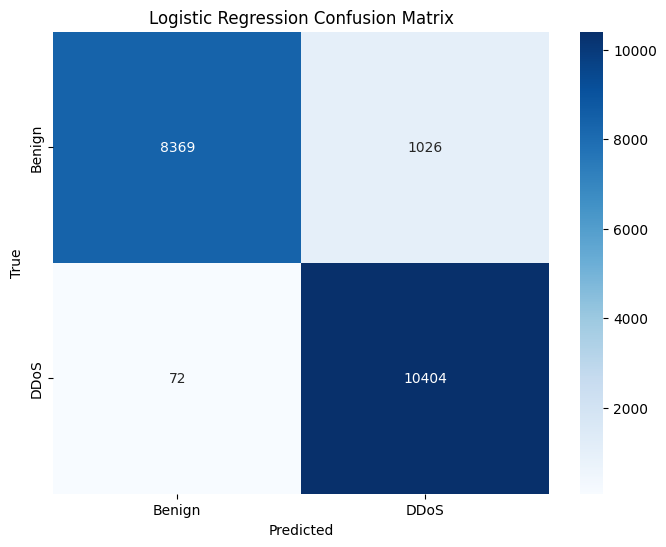

In [35]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [36]:
catmodel.save_model("my_ddos_model")

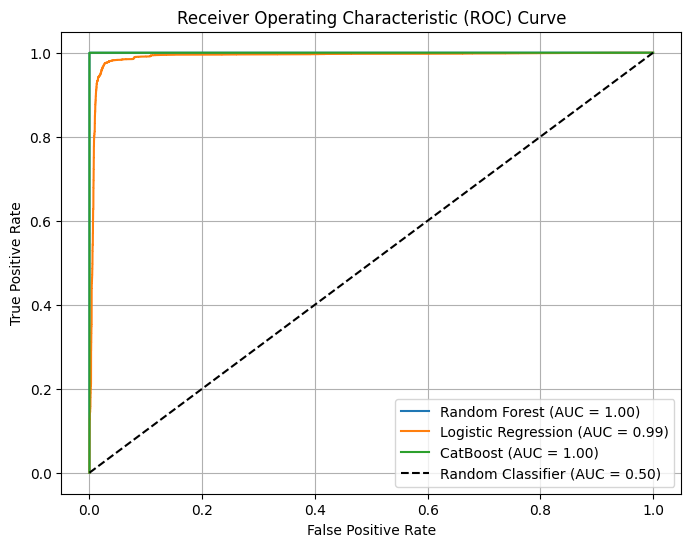

In [37]:
# Importation de CatBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialisation et entraînement du modèle CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train, y_train)

# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)

# CatBoost
cat_proba = catboost_model.predict_proba(X_test)

# Calcul de la courbe ROC pour Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calcul de la courbe ROC pour la Régression Logistique
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calcul de la courbe ROC pour CatBoost
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_proba[:, 1])
cat_auc = auc(cat_fpr, cat_tpr)

# Tracé des courbes ROC pour tous les modèles
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(cat_fpr, cat_tpr, label=f'CatBoost (AUC = {cat_auc:.2f})')

# Courbe ROC pour un classificateur aléatoire (aire de 50%)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
